<a href="https://colab.research.google.com/github/VaeriaBautista/Simulaci-n-I/blob/main/M%C3%A9todo_Box_Muller.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
#Importamos las sig librerias:
import numpy as np #Para el cálculo numérico
import matplotlib.pyplot as plt #Para la creación de gráficos y visualizaciones de datos
from scipy import stats #Para calcular media, mediana, desviación estándar, cuartiles, momentos de la distribución

In [43]:
def box_muller(n):
    """
    La transformada de Box-Müller es un método de muestreo de números pseudoaleatorios que genera pares
    de números aleatorios independientes, estándar y con distribución normal (esperanza cero,
    varianza unitaria), dada una fuente de números aleatorios con distribución uniforme.

    Argumentos:
        n= número de pares de valores a generar

    Regresa:
        Dos arreglos de tamaño n con valores de distribución normal estándar
    """
    # Generamos 2 números aleatorios uniformes en (0,1)
    #Toma dos muestras de la distribución uniforme en el intervalo (0,1) y los asigna a dos muestras estándar con distribución normal.
    u1 = np.random.random(n)
    u2 = np.random.random(n)

    # Aplicar la transformación de Box-Müller
    r = np.sqrt(-2 * np.log(u1))
    theta = 2 * np.pi * u2

    # Convertir de coordenadas polares a cartesianas
    z1 = r * np.cos(theta)  # Primer conjunto de valores normales
    z2 = r * np.sin(theta)  # Segundo conjunto de valores normales
    #Son variables aleatorias independientes con distribucion normal estandar

    return z1, z2

In [44]:
# Número de pares a generar
n_pares = 10000

# Generar números aleatorios con el método de Box-Müller
z1, z2 = box_muller(n_pares)

# Combinar ambos conjuntos para análisis
z_combinados = np.concatenate([z1, z2])

In [45]:
print(f"Resultados del análisis de {len(z_combinados)} números generados:")

Resultados del análisis de 20000 números generados:


In [46]:
# Calcular estadísticas descriptivas
media_empirica = np.mean(z_combinados)
desv_std_empirica = np.std(z_combinados)

In [47]:
print(f"Media empírica: {media_empirica:.6f} (teórica: 0)")
print(f"Desviación estándar empírica: {desv_std_empirica:.6f} (teórica: 1)")

Media empírica: 0.000590 (teórica: 0)
Desviación estándar empírica: 0.997158 (teórica: 1)


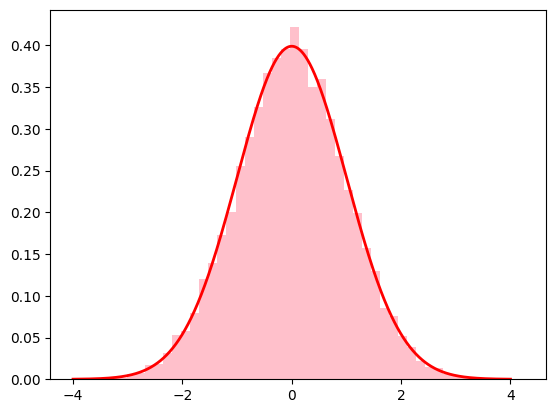

In [48]:
# Graficar histograma
c= plt.hist(z_combinados, bins=50, density=True,
                           color='pink')

# Agregar la curva de la distribución normal teórica
x = np.linspace(-4, 4, 1000)
plt.plot(x, stats.norm.pdf(x, 0, 1), 'r-', lw=2,
         label='Teórica N(0,1)')

Text(0.5, 1.0, 'QQ-Plot de distribución normal')

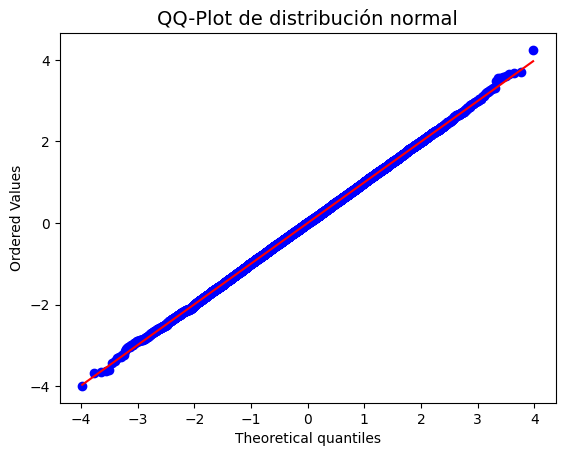

In [53]:
#QQ-plot sirve para verificar gráficamente si los datos siguen una distribución normal
stats.probplot(z_combinados, dist="norm", plot=plt)
plt.title('QQ-Plot de distribución normal', fontsize=14)
